https://drive.google.com/file/d/1qXY__4wYfjLcLTKWYWlVYHOXFgY8L-qP/view?usp=sharing

In [66]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify

In [67]:
#Cargamos el dataframe y nos interiorizamos de sus campos
#Que no haya una columna que se llame 'Unnamed: 0'
df = pd.read_csv('data_nps.csv')

In [68]:
#imprimir lo de abajo
df.head()

,Unnamed: 0,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS
0,0,2021-06-11 10:30:03 UTC,2021-06-12 10:43:18 UTC,2,M,1954-09-18 00:00:00 UTC,1402267,66.0,DOMINGO FAUSTINO SARMIENTO,Service,5671770,2021-06-09 00:00:00 UTC,EUROP,Automotores Individuales,0,mot Grua mot Servicio mot Accesibilidad mo...
1,1,2021-06-10 10:30:03 UTC,2021-06-12 17:38:35 UTC,5,F,1994-10-06 00:00:00 UTC,23733377,26.0,CORDOBA,Service,5662123,2021-06-08 00:00:00 UTC,AUXICAJA,Automotores Individuales,9,mot Servicio mot Precio atr Eficacia mot A...
2,2,2021-06-07 10:30:03 UTC,2021-06-12 16:52:27 UTC,5,M,1980-08-07 00:00:00 UTC,21113765,40.0,DIAMANTE,Service,5625253,2021-06-03 00:00:00 UTC,AUXICAJA,Automotores Individuales,10,NaN
3,3,2021-06-10 10:30:03 UTC,2021-06-13 19:29:41 UTC,5,M,1959-09-12 00:00:00 UTC,19579674,61.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5663499,2021-06-09 00:00:00 UTC,SUCURSAL,Automotores Individuales,10,mot Grua atr Eficacia
4,4,2021-05-31 10:30:03 UTC,2021-06-06 22:26:27 UTC,1,M,1952-04-19 00:00:00 UTC,13972088,69.0,TRANCAS,Claims,5582911,2021-05-21 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Siniestro atr Eficacia


In [69]:
#mostrar nombres de columna
df.columns

Index(['Unnamed: 0', 'CREATION_DATE', 'RESPONSE_DATE', 'CURRENT_STATUS',
       'GENDER', 'DAY_OF_BIRTH', 'CIF_ID', 'AGE', 'LOCATION',
       'TOUCHPOINT_NUMBER', 'CASE_NUMBER', 'CASE_DATE', 'CASE_CHANNEL',
       'PRODUCT_NAME', 'NPS_SCORE', 'TAGS'],
      dtype='object')

Hacer una función que determine si es promotor, detractor y neutro e implementarla a una columna del dataset que se llama nps_segment
* Promotor: NPS_SCORE = 8,9,10
* Neutro: NPS_SCORE = 6,7
* Detractor: NPS_SCORE = 1,2,3,4,5

In [70]:
def nps_segment(x):
    """funcion que discrimina por puntaje"""
    if x >= 8:
        return 'promotor'
    elif x == 6 or x == 7:
        return 'neutral'
    else:
        return 'detractor'

df["nps_segment"] = df["NPS_SCORE"].apply(nps_segment)

#Otro modo para agregar columnas condicionales es el np.select

In [71]:
df

,Unnamed: 0,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS,nps_segment
0,0,2021-06-11 10:30:03 UTC,2021-06-12 10:43:18 UTC,2,M,1954-09-18 00:00:00 UTC,1402267,66.0,DOMINGO FAUSTINO SARMIENTO,Service,5671770,2021-06-09 00:00:00 UTC,EUROP,Automotores Individuales,0,mot Grua mot Servicio mot Accesibilidad mo...,detractor
1,1,2021-06-10 10:30:03 UTC,2021-06-12 17:38:35 UTC,5,F,1994-10-06 00:00:00 UTC,23733377,26.0,CORDOBA,Service,5662123,2021-06-08 00:00:00 UTC,AUXICAJA,Automotores Individuales,9,mot Servicio mot Precio atr Eficacia mot A...,promotor
2,2,2021-06-07 10:30:03 UTC,2021-06-12 16:52:27 UTC,5,M,1980-08-07 00:00:00 UTC,21113765,40.0,DIAMANTE,Service,5625253,2021-06-03 00:00:00 UTC,AUXICAJA,Automotores Individuales,10,NaN,promotor
3,3,2021-06-10 10:30:03 UTC,2021-06-13 19:29:41 UTC,5,M,1959-09-12 00:00:00 UTC,19579674,61.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5663499,2021-06-09 00:00:00 UTC,SUCURSAL,Automotores Individuales,10,mot Grua atr Eficacia,promotor
4,4,2021-05-31 10:30:03 UTC,2021-06-06 22:26:27 UTC,1,M,1952-04-19 00:00:00 UTC,13972088,69.0,TRANCAS,Claims,5582911,2021-05-21 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Siniestro atr Eficacia,detractor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,2021-05-10 10:30:03 UTC,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza,promotor
15996,15996,2021-05-10 10:30:03 UTC,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...,neutral
15997,15997,2021-05-10 10:30:03 UTC,2021-05-10 19:38:46 UTC,0,M,1960-07-15 00:00:00 UTC,16971297,60.0,SAN MIGUEL DE TUCUMAN,Documentation Request,5435120,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,NaN,neutral
15998,15998,2021-05-10 10:30:03 UTC,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...,detractor


In [72]:
df["nps_segment"]

0        detractor
1         promotor
2         promotor
3         promotor
4        detractor
           ...    
15995     promotor
15996      neutral
15997      neutral
15998    detractor
15999     promotor
Name: nps_segment, Length: 16000, dtype: object

In [73]:
#imprimir nans en la columna TAGS
df['TAGS'].isnull().sum()

2184

Con numpy.where crear una columna llamada detected, que determina si la columna TAGS tiene algun contenido. Poner True si lo tiene y si no tiene contenido poner False.

In [74]:
#Escribi tu código acá (HINT: Buscar numpy where documentacion)
df['detected'] = np.where(df['TAGS'].notnull(), True, False)
df

,Unnamed: 0,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS,nps_segment,detected
0,0,2021-06-11 10:30:03 UTC,2021-06-12 10:43:18 UTC,2,M,1954-09-18 00:00:00 UTC,1402267,66.0,DOMINGO FAUSTINO SARMIENTO,Service,5671770,2021-06-09 00:00:00 UTC,EUROP,Automotores Individuales,0,mot Grua mot Servicio mot Accesibilidad mo...,detractor,True
1,1,2021-06-10 10:30:03 UTC,2021-06-12 17:38:35 UTC,5,F,1994-10-06 00:00:00 UTC,23733377,26.0,CORDOBA,Service,5662123,2021-06-08 00:00:00 UTC,AUXICAJA,Automotores Individuales,9,mot Servicio mot Precio atr Eficacia mot A...,promotor,True
2,2,2021-06-07 10:30:03 UTC,2021-06-12 16:52:27 UTC,5,M,1980-08-07 00:00:00 UTC,21113765,40.0,DIAMANTE,Service,5625253,2021-06-03 00:00:00 UTC,AUXICAJA,Automotores Individuales,10,NaN,promotor,False
3,3,2021-06-10 10:30:03 UTC,2021-06-13 19:29:41 UTC,5,M,1959-09-12 00:00:00 UTC,19579674,61.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5663499,2021-06-09 00:00:00 UTC,SUCURSAL,Automotores Individuales,10,mot Grua atr Eficacia,promotor,True
4,4,2021-05-31 10:30:03 UTC,2021-06-06 22:26:27 UTC,1,M,1952-04-19 00:00:00 UTC,13972088,69.0,TRANCAS,Claims,5582911,2021-05-21 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Siniestro atr Eficacia,detractor,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,2021-05-10 10:30:03 UTC,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza,promotor,True
15996,15996,2021-05-10 10:30:03 UTC,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...,neutral,True
15997,15997,2021-05-10 10:30:03 UTC,2021-05-10 19:38:46 UTC,0,M,1960-07-15 00:00:00 UTC,16971297,60.0,SAN MIGUEL DE TUCUMAN,Documentation Request,5435120,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,NaN,neutral,False
15998,15998,2021-05-10 10:30:03 UTC,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...,detractor,True


## Dates
Devolver la fecha máxima y minima de la columna CREATION_DATE

In [75]:
max(df['CREATION_DATE'])

'2021-06-15 12:35:01 UTC'

In [76]:
min(df['CREATION_DATE'])

'2020-12-10 10:30:03 UTC'

Chequear los data types de todas las columnas

In [77]:
df.dtypes

Unnamed: 0             int64
CREATION_DATE         object
RESPONSE_DATE         object
CURRENT_STATUS         int64
GENDER                object
DAY_OF_BIRTH          object
CIF_ID                 int64
AGE                  float64
LOCATION              object
TOUCHPOINT_NUMBER     object
CASE_NUMBER            int64
CASE_DATE             object
CASE_CHANNEL          object
PRODUCT_NAME          object
NPS_SCORE              int64
TAGS                  object
nps_segment           object
detected                bool
dtype: object

¿Cual es el data type de CREATION_DATE ¿Te parece correct?

Crear una columna que solo tenga año y mes. Llameémosle year_month. Utilizar pd.to_datetime() primero y luego to period

In [78]:
df['CREATION_DATE'] = pd.to_datetime(df['CREATION_DATE'])

In [79]:
#armar el código para crear la columna año mes
df['year_month'] = df['CREATION_DATE'].dt.strftime('%Y-%m')
df

,Unnamed: 0,CREATION_DATE,RESPONSE_DATE,CURRENT_STATUS,GENDER,DAY_OF_BIRTH,CIF_ID,AGE,LOCATION,TOUCHPOINT_NUMBER,CASE_NUMBER,CASE_DATE,CASE_CHANNEL,PRODUCT_NAME,NPS_SCORE,TAGS,nps_segment,detected,year_month
0,0,2021-06-11 10:30:03+00:00,2021-06-12 10:43:18 UTC,2,M,1954-09-18 00:00:00 UTC,1402267,66.0,DOMINGO FAUSTINO SARMIENTO,Service,5671770,2021-06-09 00:00:00 UTC,EUROP,Automotores Individuales,0,mot Grua mot Servicio mot Accesibilidad mo...,detractor,True,2021-06
1,1,2021-06-10 10:30:03+00:00,2021-06-12 17:38:35 UTC,5,F,1994-10-06 00:00:00 UTC,23733377,26.0,CORDOBA,Service,5662123,2021-06-08 00:00:00 UTC,AUXICAJA,Automotores Individuales,9,mot Servicio mot Precio atr Eficacia mot A...,promotor,True,2021-06
2,2,2021-06-07 10:30:03+00:00,2021-06-12 16:52:27 UTC,5,M,1980-08-07 00:00:00 UTC,21113765,40.0,DIAMANTE,Service,5625253,2021-06-03 00:00:00 UTC,AUXICAJA,Automotores Individuales,10,NaN,promotor,False,2021-06
3,3,2021-06-10 10:30:03+00:00,2021-06-13 19:29:41 UTC,5,M,1959-09-12 00:00:00 UTC,19579674,61.0,CIUDAD AUTONOMA BUENOS AIRES,Query/Servicing request,5663499,2021-06-09 00:00:00 UTC,SUCURSAL,Automotores Individuales,10,mot Grua atr Eficacia,promotor,True,2021-06
4,4,2021-05-31 10:30:03+00:00,2021-06-06 22:26:27 UTC,1,M,1952-04-19 00:00:00 UTC,13972088,69.0,TRANCAS,Claims,5582911,2021-05-21 00:00:00 UTC,CALL CENTER,Automotores Individuales,0,mot Siniestro atr Eficacia,detractor,True,2021-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,15995,2021-05-10 10:30:03+00:00,2021-05-10 10:46:11 UTC,5,M,1974-11-24 00:00:00 UTC,23609326,46.0,ISIDRO CASANOVA,Documentation Request,5436373,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,9,mot Siniestro mot Cobertura poliza,promotor,True,2021-05
15996,15996,2021-05-10 10:30:03+00:00,2021-05-10 12:12:26 UTC,0,M,1960-09-21 00:00:00 UTC,11254684,60.0,CIUDAD AUTONOMA BUENOS AIRES,Documentation Request,5434652,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,mot Siniestro mot FacturacionPagos mot Prec...,neutral,True,2021-05
15997,15997,2021-05-10 10:30:03+00:00,2021-05-10 19:38:46 UTC,0,M,1960-07-15 00:00:00 UTC,16971297,60.0,SAN MIGUEL DE TUCUMAN,Documentation Request,5435120,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,7,NaN,neutral,False,2021-05
15998,15998,2021-05-10 10:30:03+00:00,2021-05-10 10:45:03 UTC,2,M,1956-07-10 00:00:00 UTC,5768360,64.0,VILLA DOMINICO,Documentation Request,5434365,2021-05-07 00:00:00 UTC,WEB,Automotores Individuales,2,mot Siniestro atr Conformidad mot Facturaci...,detractor,True,2021-05


## Conteo.
Crear un nuevo dataframe agrupado por year_month donde tenga la cantidad de encuestas únicas mes a mes
** Hint**:
```python
df.groupby(grouping_column).agg("count")
```

In [80]:
df.groupby('year_month')['Unnamed: 0'].count().reset_index(name = 'encuestas')

,year_month,encuestas
0,2020-12,124
1,2021-01,2617
2,2021-02,2433
3,2021-03,3308
4,2021-04,2883
5,2021-05,3066
6,2021-06,1569


Crear un dataste donde sume la cantidad de encuestas con TAG detectados, mes a mes

**Hint** :
```python
df.groupby(grouping_column).agg(
    new_col_name =  ('old_col_name', 'sum'),
    new_col_name_2 = ('old_col_name', 'mean')
)
```

In [81]:
df.groupby('year_month')['detected'].sum()

year_month
2020-12     111
2021-01    2246
2021-02    2139
2021-03    2866
2021-04    2466
2021-05    2632
2021-06    1356
Name: detected, dtype: int64

Crear otro dataset donde tenga la cantidad de encuestas por nps_segment unicas por mes. promotoras, neutras y detractoras.

In [82]:
df.groupby(['year_month','nps_segment'])['Unnamed: 0'].count().to_frame()

Unnamed: 0
year_month nps_segment            
2020-12    detractor            16
           neutral               8
           promotor            100
2021-01    detractor           409
           neutral             180
           promotor           2028
2021-02    detractor           472
           neutral             162
           promotor           1799
2021-03    detractor           553
           neutral             261
           promotor           2494
2021-04    detractor           416
           neutral             206
           promotor           2261
2021-05    detractor           430
           neutral             212
           promotor           2424
2021-06    detractor           219
           neutral             100
           promotor           1250

### Seg,emtps
Crear un dataset que agrupe por segmento los CIF_ID únicos

In [83]:
dataset_por_segmento = df.groupby('nps_segment')
dataset_por_segmento

In [84]:
#reset_index() implementalo al dataset y asignaselo
dataset_por_segmento = dataset_por_segmento['CIF_ID'].count().reset_index()

Cantidad que hay por detractor, promotor y neutro

In [85]:
dataset_por_segmento

,nps_segment,CIF_ID
0,detractor,2515
1,neutral,1129
2,promotor,12356


# Countplot
Hacer un countplot por la cantidad de NPS segment

In [86]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 6,6
paleta = ["#66bd63","#a50026", "#fee08b"]

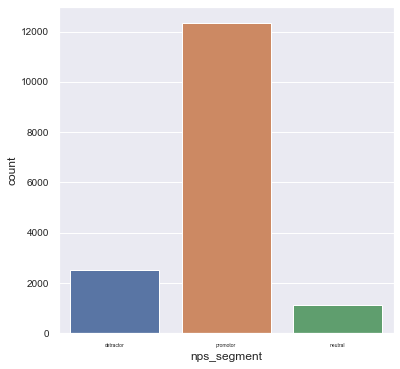

In [87]:
sns.countplot(data = df, x = df['nps_segment'])
plt.show()

In [88]:
#imprimir las cantidades
dataset_por_segmento

,nps_segment,CIF_ID
0,detractor,2515
1,neutral,1129
2,promotor,12356


# Crosstab

Armar un crostab por year_month en el index y NPS segment cómo columna

In [89]:
crosstb = pd.crosstab(df['year_month'], df['nps_segment'])
crosstb

nps_segment,detractor,neutral,promotor
year_month,,,
2020-12,16,8,100
2021-01,409,180,2028
2021-02,472,162,1799
2021-03,553,261,2494
2021-04,416,206,2261
2021-05,430,212,2424
2021-06,219,100,1250


¿Para que sirve esta tabla?

Armar en terminos relativos. Es decir, en porcentaje de total por mes.

In [92]:
division = crosstb.div(crosstb.sum(axis=1), axis = 0)
multiplicacion = division.mul(100).round(2)
crosstb_relativo = multiplicacion.add_suffix(' (%)')
crosstb_relativo

nps_segment,detractor (%),neutral (%),promotor (%)
year_month,,,
2020-12,12.90,6.45,80.65
2021-01,15.63,6.88,77.49
2021-02,19.40,6.66,73.94
2021-03,16.72,7.89,75.39
2021-04,14.43,7.15,78.43
2021-05,14.02,6.91,79.06
2021-06,13.96,6.37,79.67


# Lineplot

En el eje x gráfica el mes y en el eje y tres lineas con detractor, neutro y promotor

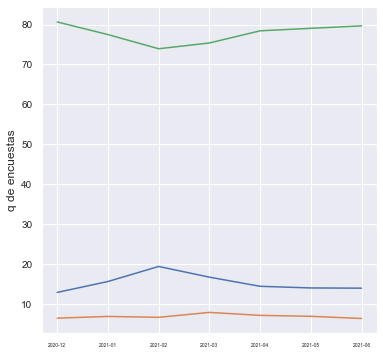

In [94]:
meses = crosstb.index
plt.plot(meses, crosstb_relativo['detractor (%)'])
plt.plot(meses, crosstb_relativo['neutral (%)'])
plt.plot(meses, crosstb_relativo['promotor (%)'])
plt.ylabel('q de encuestas')
plt.show()

Armar un cross tab con los comentarios detectados mes a mes

In [95]:
crosstb_detected = pd.crosstab(df['detected'],df['year_month'])
pivot = pd.pivot_table(df,values = 'CIF_ID',index='detected',columns='year_month', aggfunc= 'count')

crosstb_detected
#Hecho tambien con pd.pivot
#pivot

year_month,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06
detected,,,,,,,
False,13,371,294,442,417,434,213
True,111,2246,2139,2866,2466,2632,1356


¿Que mes es en el que más falla? ¿podemos sacar una conclusión?

# Case Channel

Reproducí este gráfico. ¿Para qué sirve?

HINT:

plt.rc('xtick', labelsize=24)
plt.rc('ytick', labelsize=10)
ax = sns.countplot(data = df, x = 'CASE_CHANNEL',
              order = df['CASE_CHANNEL'].value_counts().index)

<BarContainer object of 8 artists>

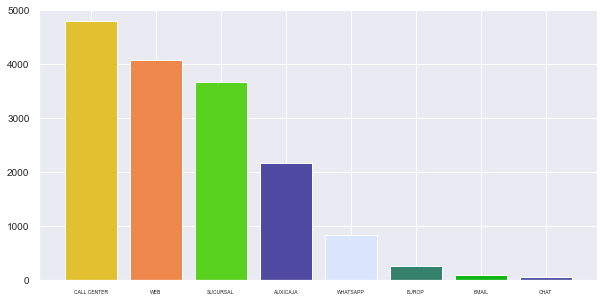

In [96]:
case_channel_group = df.groupby('CASE_CHANNEL')['Unnamed: 0'].count().to_frame(name = 'casos').sort_values(by = 'casos', ascending = False)
plt.figure(figsize= (10,5))
plt.bar(case_channel_group.index, case_channel_group.casos, color = np.random.rand(len(case_channel_group.index),3))

Instala la librería squarify y ejecuta la linea de código de aca abajo importala y

In [ ]:
#filtro = df[df['CASE_CHANNEL'].map(df['CASE_CHANNEL'].value_counts()) > 900]
label_value = df["CASE_CHANNEL"].value_counts().to_dict()
# Creo los labels usando a list comprehesion
labels = ["{} tiene {} obs".format(class_, obs) for class_, obs in label_value.items()]
# Creo colores por cantidad de trabajos
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
plt.figure(figsize = (18, 10))
squarify.plot(sizes = label_value.values(), label = labels,  color = colors, alpha = 0.8)
plt.title("Cantidad de casos por CASE_CHANNEL");

Crear un cross tab entre segmento y Case chanel

In [97]:
cross_nps_case = pd.crosstab(df['CASE_CHANNEL'], df['nps_segment'])
div = cross_nps_case.div(cross_nps_case.sum(axis = 1), axis = 0)
cross_nps_case = div.mul(100).round(2).reset_index()
cross_nps_case

nps_segment,CASE_CHANNEL,detractor,neutral,promotor
0,AUXICAJA,9.22,4.77,86.01
1,CALL CENTER,12.13,6.55,81.32
2,CHAT,32.26,11.29,56.45
3,EMAIL,27.45,3.92,68.63
4,EUROP,22.71,9.52,67.77
5,SUCURSAL,17.53,7.80,74.68
6,WEB,17.75,7.39,74.86
7,WHATSAPP,30.43,10.26,59.31


# Plotea un gráfico de barras

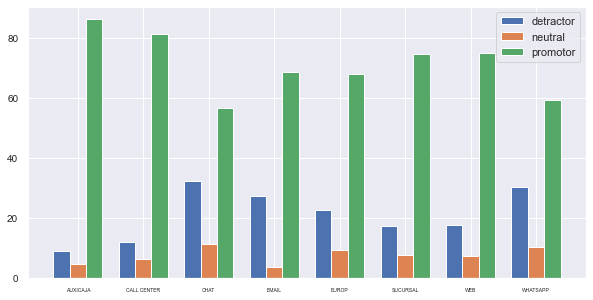

In [98]:
X = list(cross_nps_case['CASE_CHANNEL'].unique())

ind = np.arange(len(X))
width = 0.25

Y_detractor = list(cross_nps_case['detractor'])
Y_neutral = list(cross_nps_case['neutral'])
Y_promotor = list(cross_nps_case['promotor'])

plt.figure(figsize=(10,5))
bar1 = plt.bar(ind -width, Y_detractor, width, label = 'detractor')
bar2 = plt.bar(ind, Y_neutral, width, label = 'neutral')
bar3 = plt.bar(ind + width, Y_promotor, width, label = 'promotor')

plt.xticks(ticks = ind,labels = list(cross_nps_case['CASE_CHANNEL'].unique()))
plt.legend((bar1,bar2,bar3), ('detractor', 'neutral', 'promotor'))
plt.show()

### Crear un crostab de nps_segment por genero en porcentaje

In [99]:
cross_edad = pd.crosstab(df['nps_segment'], df['GENDER'])
cross_edad = cross_edad.div(cross_edad.sum(axis=0), axis =1).mul(100).round(2)
cross_edad

GENDER,F,M
nps_segment,,
detractor,14.72,16.22
neutral,6.44,7.34
promotor,78.84,76.44


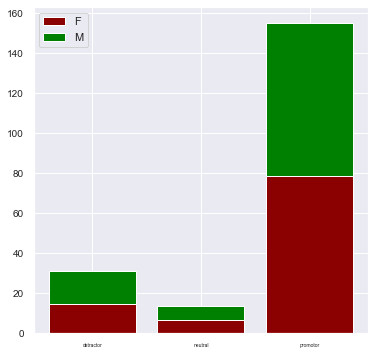

In [100]:
X = list(cross_edad.index)
values_F = cross_edad['F']
values_M = cross_edad['M']

barF = plt.bar(X, values_F, color = 'darkred')
barM = plt.bar(X, values_M, bottom = values_F, color = 'green')
plt.legend((barF, barM), ('F', 'M'))
plt.show()

# Edad

Imprimir los siguientes valores

In [ ]:
print(f'La edad maxima es: {df["AGE"].max()}')
print(f'La median de la edad es: {df["AGE"].median()}')
print(f'La median de la edad es: {df["AGE"].mean()}')
print(f'La median de la edad es: {df["AGE"].min()}')

Graficar la distribución de la edad

Text(0.5, 1.0, 'Distribución de la edad en la muestra')

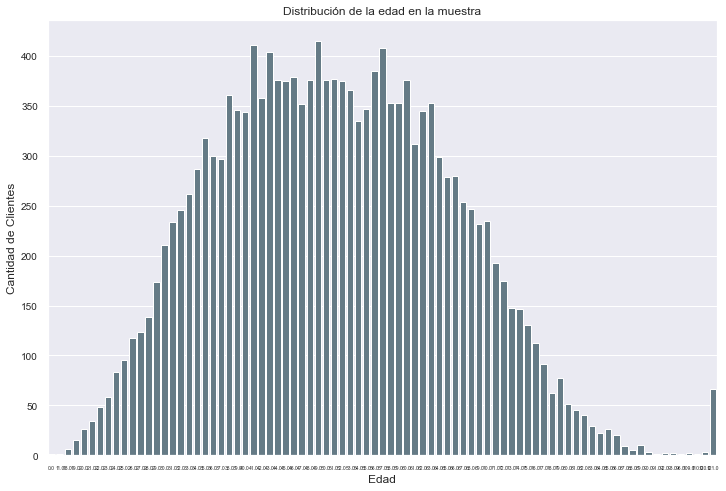

In [101]:
rcParams['figure.figsize'] = 12,8
sns.set()
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=10)
sns.countplot(x = 'AGE', data = df,color = "#607d8b")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Clientes")
plt.title("Distribución de la edad en la muestra")

# Boxplot

Armar un boxplot por segmento, representando en el eje Y la edad.

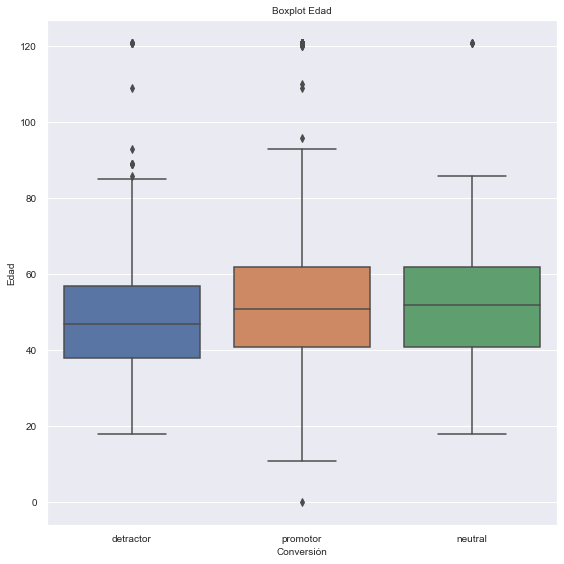

In [103]:
fig, (ax1) = plt.subplots( figsize = (8, 8))
sns.boxplot(data = df, x = 'nps_segment', y = 'AGE')
ax1.set_xlabel('Conversión', fontsize=10)
ax1.set_ylabel('Edad', fontsize=10)
ax1.set_title('Boxplot Edad', fontsize=10)
ax1.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)

plt.tight_layout()

# Discretización
Representar la edad en grupos de deacadas

In [104]:
#primero crear la columna según regla de edad

lst = [df]
for column in lst:
    column.loc[column["AGE"] < 30,  'grupo_edad'] = 20
    column.loc[(column["AGE"] >= 30) & (column["AGE"] <= 39), 'grupo_edad'] = 30
    column.loc[(column["AGE"] >= 40) & (column["AGE"] <= 49), 'grupo_edad'] = 40
    column.loc[(column["AGE"] >= 50) & (column["AGE"] <= 59), 'grupo_edad'] = 50
    column.loc[column["AGE"] >= 60, 'grupo_edad'] = 60

#luego crosstab

per_edad = pd.crosstab(df['nps_segment'],df['grupo_edad'])
per_edad = per_edad.T
per_edad

nps_segment,detractor,neutral,promotor
grupo_edad,,,
20.0,185,58,679
30.0,571,184,2107
40.0,662,254,2874
50.0,560,274,2841
60.0,526,352,3809


In [ ]:
#ULTRA HINT: per_edad = pd.crosstab(df['nps_segment'],df['grupo_edad'])
per_edad = per_edad.T
per_edad

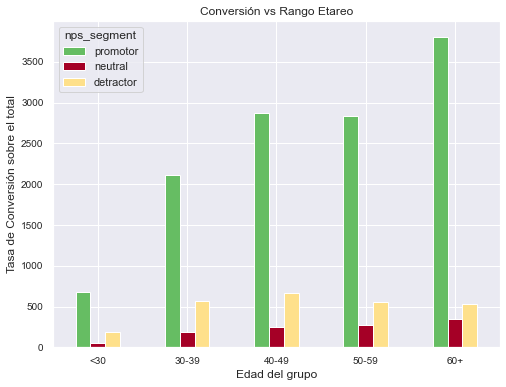

In [106]:
rcParams['figure.figsize'] = 8,6
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
sns.set_style("darkgrid")
plot_age = per_edad[["promotor","neutral", "detractor"]].plot(kind = 'bar',color = paleta)
plt.xlabel('Edad del grupo')
plt.ylabel('Tasa de Conversión sobre el total')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Conversión vs Rango Etareo')
plt.show()